In [1]:
import SimpleITK as sitk
import tensorflow.python
import numpy as np
import nibabel as nib
import scipy.misc
from tqdm import tqdm_notebook
import os
import cv2
from PIL import Image,ImageOps


In [2]:
raw_seg = nib.load(os.path.join(r"C:\Users\higuchi\Desktop\kits19\data\case_00"+str(1).zfill(3),"segmentation.nii.gz"))
raw_vol = nib.load(os.path.join(r"C:\Users\higuchi\Desktop\kits19\data\case_00"+str(1).zfill(3),"imaging.nii.gz"))

In [48]:
%%time
#被験者00001を観察
#nib_ver
affine = raw_vol.affine
vol = raw_vol.get_data()
seg = raw_seg.get_data()

#{"case_id": "case_00001", "captured_pixel_width": 0.798828125, "captured_slice_thickness": 0.5}
print(seg[:,:,:].shape)
tmp_im=seg[:,:,150]
#slicerに合わせるように回転したのち反転してる
#0以外の部分はすべて255に変換している。
ret,thresh = cv2.threshold(tmp_im,0,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

for i,contour in enumerate(contours):
    cnt = contour

    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
#     print ('重心:',M)
    print (f'{i}:面積:',area,'周囲長:',perimeter)





(602, 512, 512)
0:面積: 6.0 周囲長: 9.656854152679443
1:面積: 108.0 周囲長: 51.455843567848206
2:面積: 723.0 周囲長: 200.99494767189026
3:面積: 23.0 周囲長: 20.485281229019165
4:面積: 42.5 周囲長: 26.727921843528748
5:面積: 8.5 周囲長: 13.071067571640015
6:面積: 4.0 周囲長: 7.656854152679443
7:面積: 11.5 周囲長: 13.899494767189026
8:面積: 10909.0 周囲長: 733.0681012868881
Wall time: 31.9 ms


In [50]:
b

array([[269, 383],
       [194, 333],
       [301, 174],
       [376, 224]], dtype=int64)

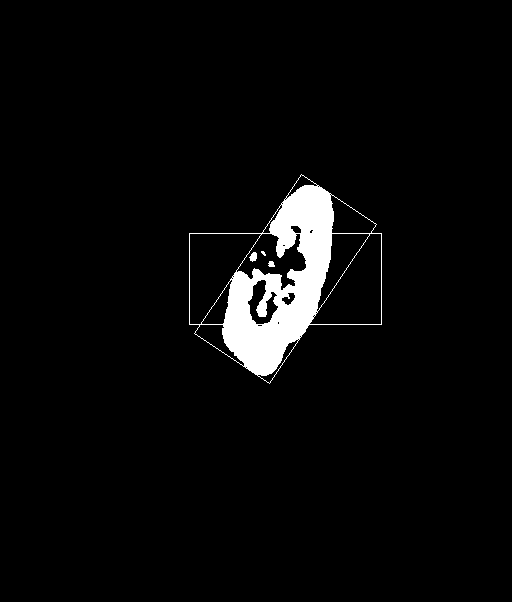

In [53]:
cnt=contours[8]
#box2Dの形で帰ってくる(左上の点(x,y)，横と縦のサイズ(width, height)，回転角)
rect = cv2.minAreaRect(cnt)
#長方形の4隅の点に変更
box = cv2.boxPoints(rect)
horizon_rect=(rect[0],rect[1],0)
horizon_box = cv2.boxPoints(horizon_rect)

#引数が(x,y)で格納されている
box = np.int0(box)
horizon_box=np.int0(horizon_box)

# 引数1:入力画像, 引数2:listとして保存されている輪郭,　引数3:描画したい輪郭のインデックス  ,4以降描画の色と太さ
im = cv2.drawContours(thresh,[horizon_box,box],1,(255,255,255),1)
Image.fromarray(im)

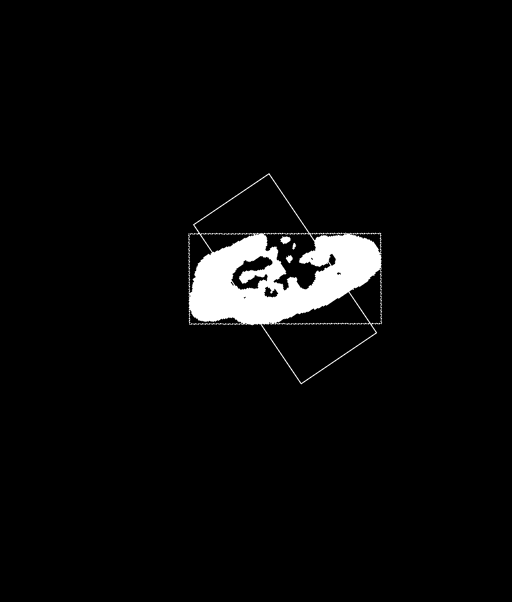

In [54]:
def rotate(image, angle,center):
    h, w = image.shape[:2]
    affine = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, affine, (w, h))

Image.fromarray(rotate(im,-55.93,(285,278)))

In [ ]:
def rot_cut(src_img, deg, center, size):
    rot_mat = cv2.getRotationMatrix2D(center, deg, 1.0)
    rot_mat[0][2] += -center[0]+size[0]/2 # -(元画像内での中心位置)+(切り抜きたいサイズの中心)
    rot_mat[1][2] += -center[1]+size[1]/2 # 同上
    return cv2.warpAffine(src_img, rot_mat, size)

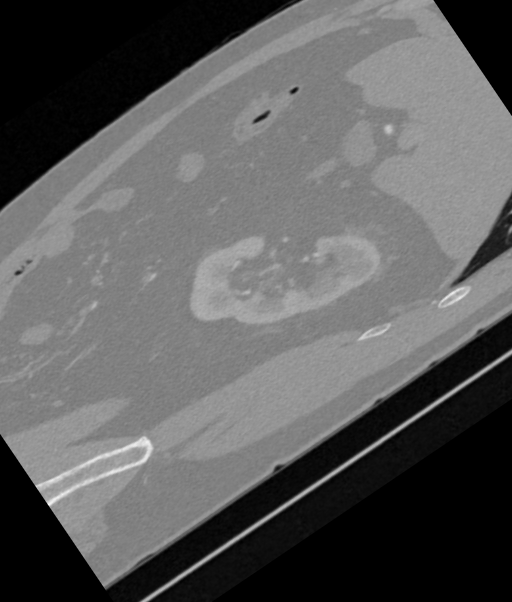

In [29]:
#volデータの確認
tmp_vol=vol[:,:,150]
#CT値を255に戻す
fix_vol=((tmp_vol+abs(tmp_vol.min()))*255/(abs(tmp_vol.min())+abs(tmp_vol.max()))).astype(np.uint8)

Image.fromarray(rotate(fix_vol,-55.93,(285,278)))

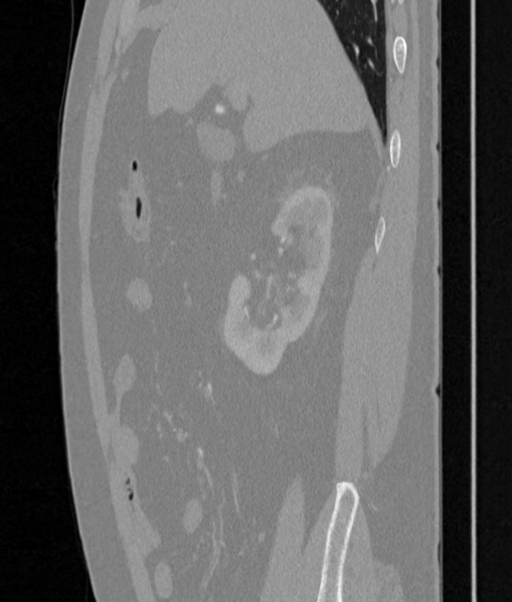

In [30]:
Image.fromarray(fix_vol)

((295.0, 245.0), (48.0, 114.0), -0.0)

In [39]:
%%time
#被験者00001を観察
#nib_ver

#{"case_id": "case_00001", "captured_pixel_width": 0.798828125, "captured_slice_thickness": 0.5}
print(seg[:,:,:].shape)
tmp_im=seg[:,:,170]
#slicerに合わせるように回転したのち反転してる
#0以外の部分はすべて255に変換している。
ret2,thresh2 = cv2.threshold(tmp_im,0,255,0)
contours2,hierarchy2 = cv2.findContours(thresh2, 1, 2)

for i,contour in enumerate(contours2):
    cnt = contour

    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
#     print ('重心:',M)
    print (f'{i}:面積:',area,'周囲長:',perimeter)



cnt2=contours2[2]
#box2Dの形で帰ってくる(左上の点(x,y)，横と縦のサイズ(width, height)，回転角)
rect2 = cv2.minAreaRect(cnt2)
#長方形の4隅の点に変更
box2 = cv2.boxPoints(rect2)


#引数が(x,y)で格納されている
box2 = np.int0(box2)


# 引数1:入力画像, 引数2:listとして保存されている輪郭,　引数3:描画したい輪郭のインデックス  ,4以降描画の色と太さ
im2 = cv2.drawContours(thresh2,[box2],0,(255,255,255),1)


(602, 512, 512)
0:面積: 11.5 周囲長: 19.899494767189026
1:面積: 10.0 周囲長: 18.485281229019165
2:面積: 4028.0 周囲長: 332.93607199192047
Wall time: 12 ms


In [42]:
box2

array([[271, 302],
       [271, 188],
       [319, 188],
       [319, 302]], dtype=int64)

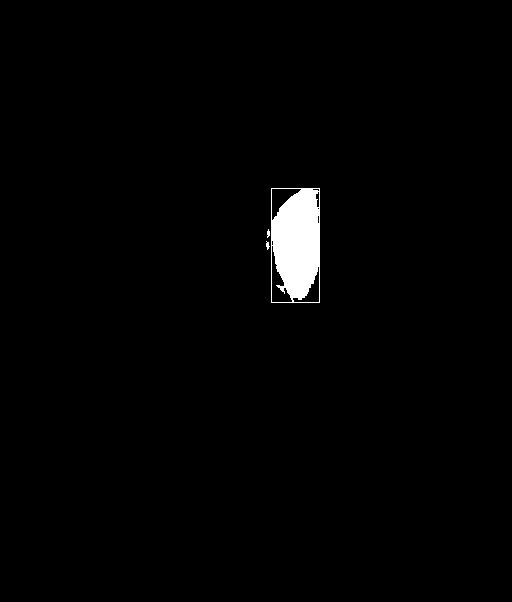

In [40]:
Image.fromarray(im2)

In [41]:
rect2

((295.0, 245.0), (48.0, 114.0), -0.0)

In [ ]:
Image.fromarray(rotate(im2,-55.93,(285,278)))

In [108]:
%%time
#sitk_ver

#被験者00001を観察
seg_img = sitk.ReadImage(os.path.join(r"C:\Users\higuchi\Desktop\kits19\data\case_00"+str(1).zfill(3),"segmentation.nii.gz"))
ct_img = sitk.ReadImage(os.path.join(r"C:\Users\higuchi\Desktop\kits19\data\case_00"+str(1).zfill(3),"imaging.nii.gz"))

seg_array = sitk.GetArrayFromImage(seg_img)
ct_array = sitk.GetArrayFromImage(ct_img)

#{"case_id": "case_00001", "captured_pixel_width": 0.798828125, "captured_slice_thickness": 0.5}
print(seg_array[:,:,:].shape)
tmp_im=seg_array[:,260,:]



# tmp_im=np.where(tmp_im==1,127,tmp_im)
# tmp_im=np.where(tmp_im==2,255,tmp_im)
# pil_img = Image.fromarray(tmp_im)
# print(pil_img.size)
# #slicerに合わせるように回転したのち反転してる
# img=ImageOps.mirror(pil_img.rotate(270))
# img

(512, 512, 602)
0:面積: 150.5 周囲長: 59.21320283412933
1:面積: 15.0 周囲長: 14.485281229019165
2:面積: 241.5 周囲長: 86.66904652118683
3:面積: 85.5 周囲長: 38.38477599620819
4:面積: 1.0 周囲長: 6.828427076339722
5:面積: 19.5 周囲長: 21.071067690849304
6:面積: 9872.0 周囲長: 622.3574253320694
7:面積: 15.5 周囲長: 15.071067690849304
8:面積: 26.5 周囲長: 20.727921843528748
9:面積: 63.0 周囲長: 32.14213526248932
10:面積: 48.0 周囲長: 30.97056233882904
11:面積: 21.0 周囲長: 17.313708186149597
12:面積: 7391.5 周囲長: 645.712764620781
Wall time: 6.08 s


In [74]:
img=np.asarray(img)

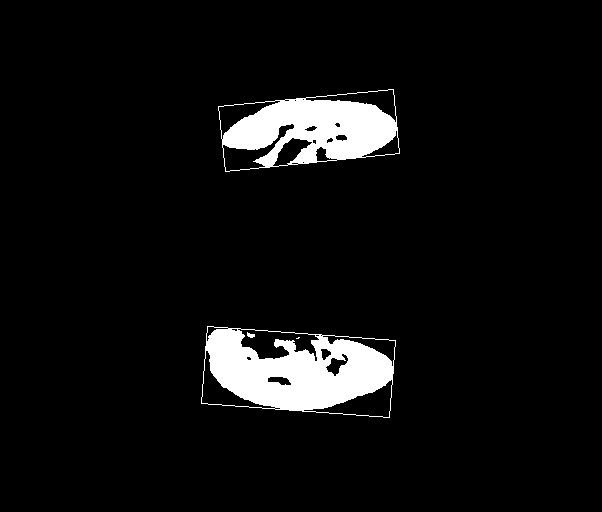

In [75]:
Image.fromarray(thresh)

In [61]:
len(contours)

13

In [91]:
ret,thresh = cv2.threshold(tmp_im,0,255,0)
# #輪郭を見つける args2...contour_retrievalmode  args3...輪郭検出方法
#この場合13か所の輪郭がlistで格納されている
contours,hierarchy = cv2.findContours(thresh, 1, 2)

for i,contour in enumerate(contours):
    cnt = contour

    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
#     print ('重心:',M)
    print (f'{i}:面積:',area,'周囲長:',perimeter)



In [90]:
cnt=contours[6]
cnt2=contours[2]

#box2Dの形で帰ってくる(左上の点(x,y)，横と縦のサイズ(width, height)，回転角)
rect = cv2.minAreaRect(cnt)
#長方形の4隅の点に変更
box = cv2.boxPoints(rect)

rect2 = cv2.minAreaRect(cnt2)
#長方形の4隅の点に変更
box2 = cv2.boxPoints(rect2)


#引数が(x,y)で格納されている
box = np.int0(box)
box2 = np.int0(box2)

# 引数1:入力画像, 引数2:listとして保存されている輪郭,　引数3:描画したい輪郭のインデックス  ,4以降描画の色と太さ
im = cv2.drawContours(thresh,[box,box2],1,(255,255,255),1)
Image.fromarray(im)

IndexError: list index out of range

In [29]:
M = cv2.moments(cnt)
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
print ('重心:',M)
print ('面積:',area)
print ('周囲長:',perimeter)

重心: {'m00': 150.5, 'm10': 42013.666666666664, 'm01': 57210.33333333333, 'm20': 11734508.25, 'm11': 15971820.791666666, 'm02': 21748442.583333332, 'm30': 3279127708.8, 'm21': 4461231438.65, 'm12': 6072032185.85, 'm03': 8267944788.200001, 'mu20': 5948.869416760281, 'mu11': 951.1932908836752, 'mu02': 786.5028608366847, 'mu30': -5751.307564735413, 'mu21': 1839.1751336432062, 'mu12': 1266.3431747092109, 'mu03': 324.0469570159912, 'nu20': 0.2626403424580427, 'nu11': 0.04199482526169359, 'nu02': 0.03472380485145571, 'nu30': -0.020697855151056672, 'nu21': 0.006618839296125113, 'nu12': 0.004557326713384752, 'nu03': 0.0011661829771689894}
面積: 150.5
周囲長: 59.21320283412933


In [30]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(im,[box],0,(0,0,255),2)

In [33]:
rect

((279.0, 380.5), (24.0, 9.0), -0.0)

(602, 512)


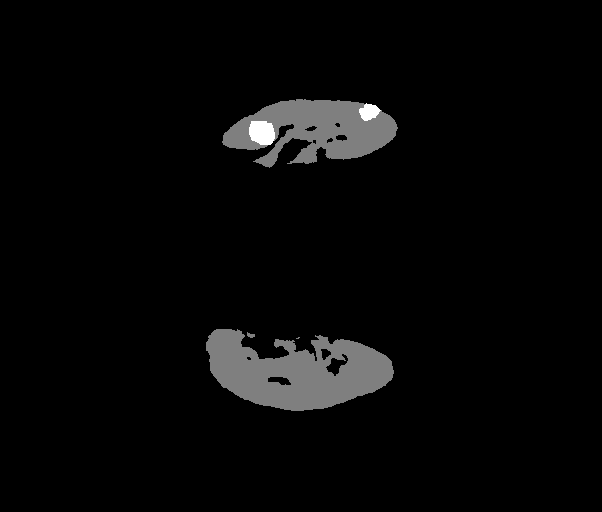

In [32]:
pil_img = Image.fromarray(im)
print(pil_img.size)
#slicerに合わせるように回転したのち反転してる
img=ImageOps.mirror(pil_img.rotate(270))
img

In [12]:
#この方法だと、x,y方向の余計な部分を取り除けていない。
FIXED_SIZE=(256,256)
for q in tqdm_notebook(range(210)):
    ## Read image
    seg = nib.load(os.path.join(r"C:\Users\higuchi\Desktop\kits19\data\case_00"+str(q).zfill(3),"segmentation.nii.gz"))
    vol = nib.load(os.path.join(r"C:\Users\higuchi\Desktop\kits19\data\case_00"+str(q).zfill(3),"imaging.nii.gz"))

    affine = vol.affine
    vol = vol.get_data()
    seg = seg.get_data()

    imagefragarray = []
    imageIndex = []
    count = 0

    #sagittal
    rnumber = len(seg[0,:,0])
    
    #高さ方向の腎臓、腎臓がんの範囲特定
    for z in range(rnumber):
        imagefragarray = seg[:,:,z]
        if np.where(imagefragarray!=0,True,False).any():
            imageIndex.append(z)
    
   # print(len(imageIndex))
    number = int(len(imageIndex)/10)#特定されたスライスの枚数/10
    snumber = -1 #スライスを10等分するための定数
  #  print(number)

    #スライスの保存（imageとsegmentation）
    for i,z in enumerate(imageIndex):
        vol_im = Image.fromarray(vol[:,:,z]).resize(FIXED_SIZE,Image.NEAREST)
        seg_im = Image.fromarray(seg[:,:,z]).resize(FIXED_SIZE,Image.NEAREST)
        
        vol_im=np.asarray(vol_im)
        seg_im=np.asarray(seg_im)

        segfrag = sitk.GetImageFromArray(seg_im)
        volfrag = sitk.GetImageFromArray(vol_im)

        if i%number==0 and snumber < 10:
            snumber += 1

       # print("saving cut to", str(q)+"imagefragment"+str(i), end="...", flush=True)
        label_path=r"C:\Users\higuchi\Desktop\LAB\201906_\segmentation\data\label_sagittal\case_00"
        image_path=r"C:\Users\higuchi\Desktop\LAB\201906_\segmentation\data\image_sagittal\case_00"
        
        os.makedirs(os.path.join(label_path+str(q).zfill(3),str(snumber)), exist_ok=True)
        os.makedirs(os.path.join(image_path+str(q).zfill(3),str(snumber)), exist_ok=True)

        outfile1 = os.path.join(label_path+str(q).zfill(3),str(snumber),"label{}.mha".format(i))
        outfile2 = os.path.join(image_path+str(q).zfill(3),str(snumber),"image{}.mha".format(i))

        sitk.WriteImage(segfrag, outfile1, True)
        sitk.WriteImage(volfrag, outfile2, True)
        count += 1



KeyboardInterrupt: 